# Do visualizations of Results
Cells are independent vizualiations of figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder

from matplotlib import gridspec

# Plot Viterbi Paths

In [7]:
def load_data(folder="../Simulated/Example0/"):
    """Load and return the Data from one Data Folder"""
    
    ref_states = np.loadtxt(folder + "refs.csv", dtype="int", delimiter=",")
    ob_stat = np.loadtxt(folder + "hap.csv", dtype="int", delimiter=",")
    lats = np.loadtxt(folder + "lat.csv", dtype="int", delimiter=",")
    viterbi_path = np.loadtxt(folder + "viterbi_path.csv", dtype="int", delimiter=",")

    print(f"Successfully loaded Data from: {folder}")
    return ref_states, ob_stat, lats, viterbi_path

Successfully loaded Data from: ../Simulated/Example0/


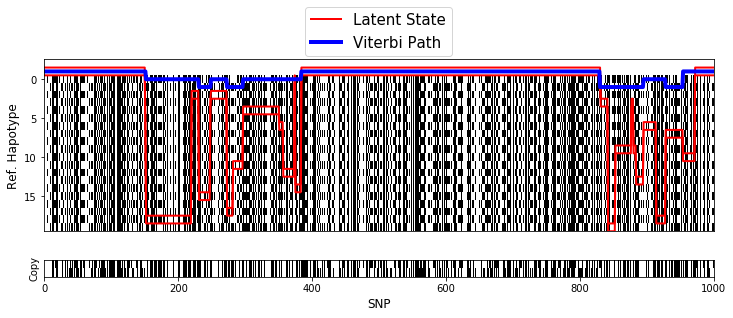

In [24]:
folder = "../Simulated/Example0/"
ref_states, ob_stat, lats, viterbi_path = load_data(folder=folder)



###########################
###########################

fs = 12

plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 1])
gs.update(hspace=0.3) # set the spacing between axes. 

ax = plt.subplot(gs[0]) # The left subplot
ax1 = plt.subplot(gs[1]) # The middle one

ax.imshow(ref_states, cmap='Greys',  aspect='auto')
ax.plot(lats-1.5, linewidth=2, color="red", label="Latent State") # Plot upper Boarder
ax.plot(lats-0.5, linewidth=2, color="red") # Plot lower boarder

ax.plot(viterbi_path-1.0, linewidth=4, color="blue", label="Viterbi Path")

ax.set_ylabel("Ref. Hapotype",fontsize=fs)
#ax.axhline(-.3)
ax.set_xticks([])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fontsize=fs*1.25) # Do the Legend

# Do the Reference SNP
ax1.imshow(ob_stat, cmap='Greys',  aspect='auto')
ax1.set_xlabel("SNP", fontsize=fs)
ax1.set_yticks([])
ax1.set_ylabel("Copy")

plt.savefig(folder + "viterbi_path.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()